### Test the Z test:

(all simulated data)

Generate N samples from a distribution of your choice, but not a Gaussian with a chosen mean μ and standard deviation σ: N(μ, σ) and calculate the mean of each sample (all samples should have the same size n).

Assess the validity of the Z-test: If the samples are drawn from the distribution you are testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). Show that the distribution of z -statistics (find the formula in a statistics book or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).

### Grading:

you must:

plot your original distribution

plot at least one of the samples

plot the distribution of z statistics

fit the z-statistics with a gaussian model and assess the goodness of fit with a simple test (AD or KS).

find the best fit values for the model parameters (mean and standard deviation) by minimizing the model chi square.

plots need have caption, axis labels, etx and comment your figures and test results appropriately (to demonstrate your understanding).

In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
np.random.seed(999)

#description of population
mydf = 4
mysigma = np.sqrt(2*mydf)
mynum =100
mysize = 1000

#mysp.stats.norm.rvs(loc=mymean, scale=mystdev, size=100)
# rvs: a way to draw
mydist={}
oridist= sp.stats.chi2.rvs(df=mydf,size=100000)
dismeans = np.zeros(mynum)
for i in range(mynum):
    #mydistrib = sp.stats.norm.rvs(loc=mymean, scale=mystdev, size=Nsamples)
    mydist[i] = sp.stats.chi2.rvs(df=mydf,size=mysize)
    dismeans[i] = mydist[i].mean()
#pl.hist(sp.stats.norm.rvs(loc=mymean, scale=mystdev, size=100))

In [3]:
dismeans

array([ 3.96892304,  3.96875275,  4.07447228,  3.9608615 ,  3.96921663,
        4.18595906,  3.89441094,  3.96941677,  3.98893497,  3.96635157,
        3.97962463,  4.19252551,  4.01650431,  4.08900382,  4.02186569,
        3.99455187,  4.00729396,  4.10406145,  3.98893405,  3.93972236,
        4.10971256,  3.97609305,  4.17792661,  4.09299782,  3.87014155,
        4.04477204,  3.92228033,  3.97206501,  4.08964354,  4.0583117 ,
        3.92339191,  4.06268621,  4.10101468,  4.0159496 ,  3.85534533,
        4.06700616,  4.13956177,  3.9298458 ,  3.97591236,  3.89784091,
        4.00777963,  3.88335939,  3.82727503,  4.01882796,  3.9924681 ,
        4.14574355,  3.97747568,  3.98243371,  4.06886911,  3.97223781,
        4.13409289,  3.9192838 ,  3.99103873,  3.79708412,  4.10418812,
        4.14467176,  3.95407681,  3.99101142,  3.86933807,  3.98260002,
        3.9982474 ,  4.03724434,  4.08353935,  4.01980001,  3.94058242,
        3.96873134,  3.92936398,  3.94877245,  4.06426198,  3.97

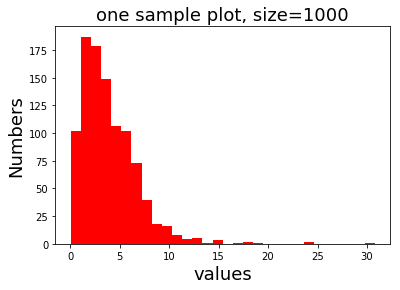

In [4]:
pl.hist(mydist[1],bins=30,color='r');
pl.ylabel("Numbers", fontsize = 18)
pl.xlabel('values',fontsize = 18)
pl.title('one sample plot, size=1000',fontsize = 18)

caption:

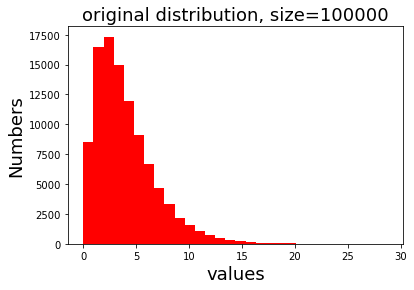

In [5]:
pl.hist(oridist,bins=30,color='r');
pl.ylabel("Numbers", fontsize = 18)
pl.xlabel('values',fontsize = 18)
pl.title('original distribution, size=100000',fontsize = 18)

caption:

In [6]:
sampleZ = {}
for i in range(mynum):
    sampleZ[i]=(dismeans[i]-mydf)*np.sqrt(mysize)/mysigma

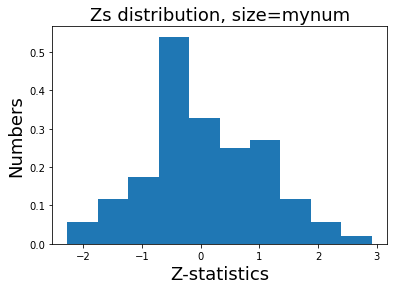

In [7]:
pl.hist(sampleZ.values(),bins=10,normed=True);
pl.ylabel("Numbers", fontsize = 18)
pl.xlabel('Z-statistics',fontsize = 18)
pl.title('Zs distribution, size=mynum',fontsize = 18)

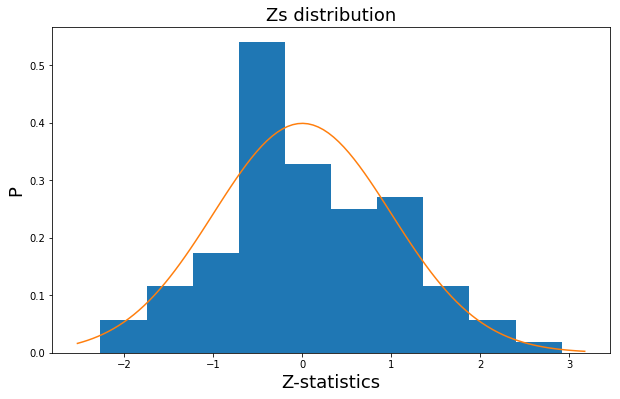

In [15]:
fitnorm=pl.figure(figsize=(10,6)).add_subplot(111)

fitnorm.hist(sampleZ.values(),bins=10,normed=True);
fitnorm.set_ylabel("P", fontsize = 18)
fitnorm.set_xlabel('Z-statistics',fontsize = 18)
fitnorm.set_title('Zs distribution',fontsize = 18)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = sp.stats.norm.pdf(x,0, 1.)
fitnorm.plot(x, y)

In [9]:
sp.stats.kstest(sampleZ.values(),'norm')

KstestResult(statistic=0.072233812740189585, pvalue=0.67202386285079285)

### p-value $>=$ 0.05, so we can't reject $H_0$, so z-stat distribution fits the gaussian distribution

### find the best fit values for the model parameters (mean and standard deviation) by minimizing the model chi square.